In [41]:
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import tarfile
import urllib.request
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [42]:
#Function for loading the dataset
def load_sales_data():
    tarball_path = Path("C:/pycharm_projects/pythonProject/Train.csv")

    if not tarball_path.is_file():
        Path("C:/pycharm_projects/pythonProject").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/taniabuzykina/store-sales-prediction/raw/tania/data/Train.csv"
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="C:/pycharm_projects/pythonProject")

    return pd.read_csv(Path("C:/pycharm_projects/pythonProject/Train.csv"))

In [43]:
sales = load_sales_data()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


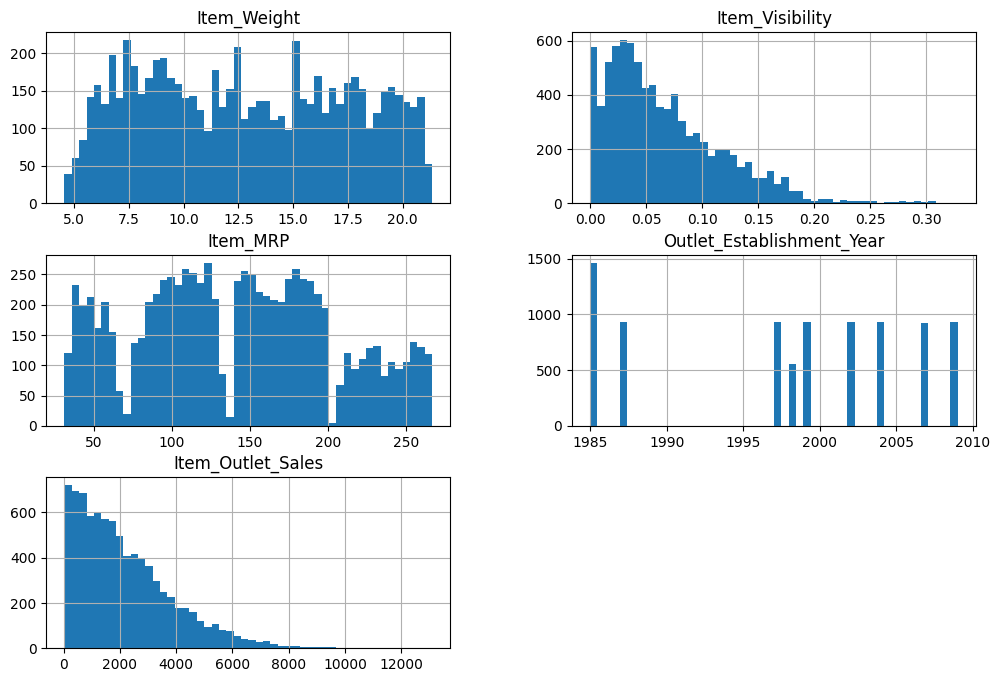

In [36]:
sales.hist(bins=50, figsize=(12, 8))
plt.show()


In [45]:
#Categorical variables
def get_categorical_info(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    # Display information for each categorical column
    for column in categorical_columns:
        unique_categories = df[column].nunique()

        if unique_categories <= 5:
            # Display value counts for categories if they are 5 or fewer
            print(f"\nValue counts for {column}:\n{df[column].value_counts()}\n")
        else:
            # Display the number of categories if they are more than 5
            print(f"\n{column} has {unique_categories} unique categories.\n")
get_categorical_info(sales)


Item_Identifier has 1559 unique categories.


Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type has 16 unique categories.


Outlet_Identifier has 10 unique categories.


Value counts for Outlet_Size:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


Value counts for Outlet_Location_Type:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Value counts for Outlet_Type:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



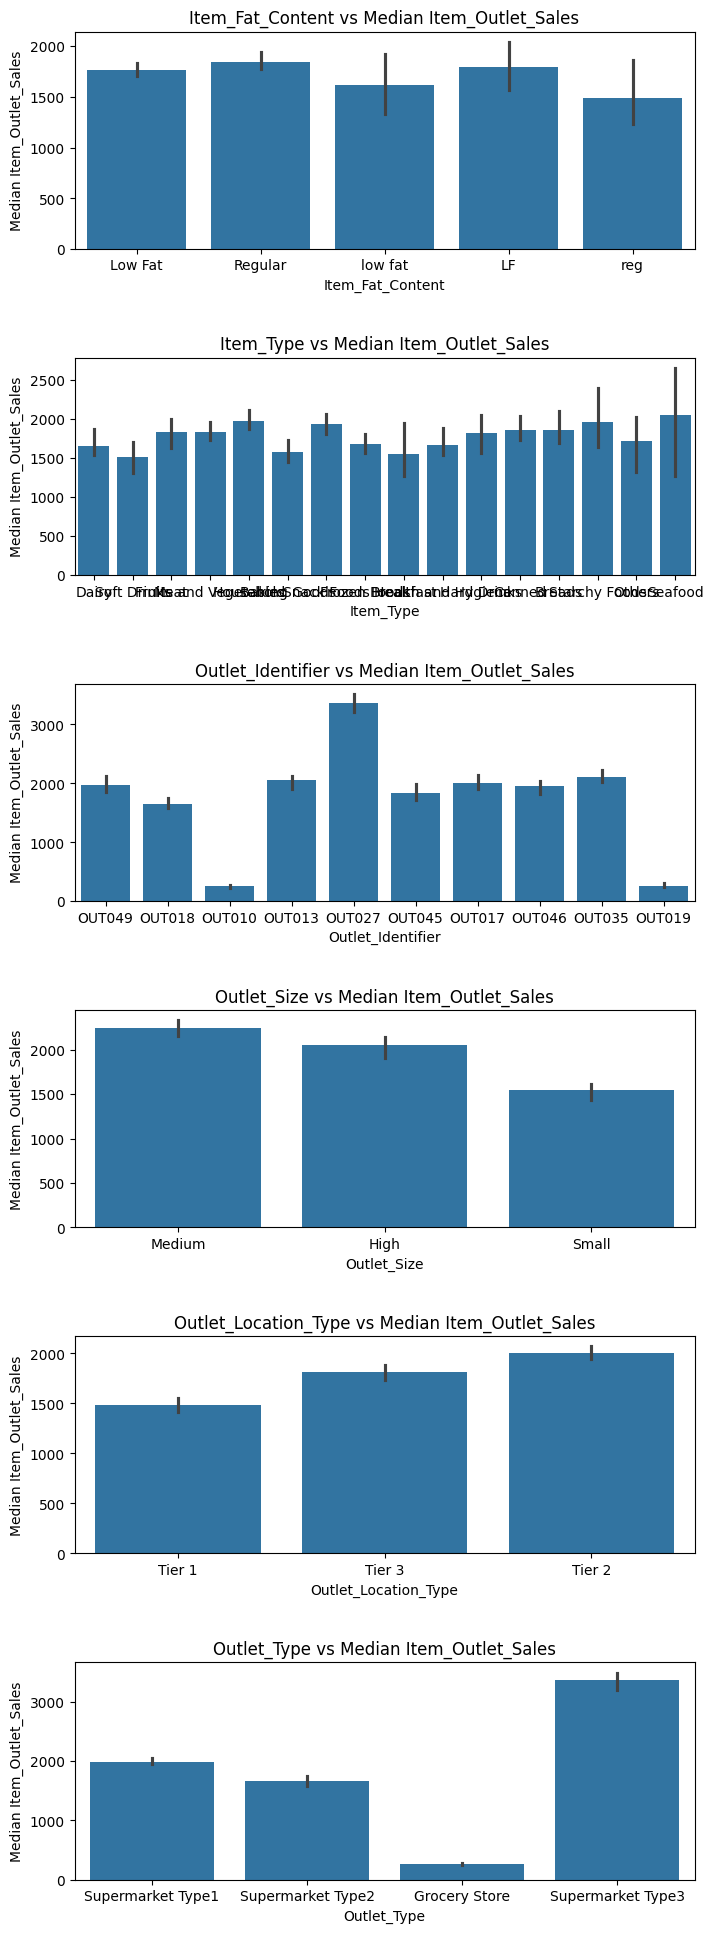

In [46]:
 
def plot_categorical_vs_median(data, target_column='Item_Outlet_Sales', discard_variable=None):
    """
    Plot each categorical variable against the median of the target variable.

    Parameters:
    - data: DataFrame, the dataset.
    - target_column: str, the target variable.
    - discard_variable: str or None, the variable to discard from the plot.

    Returns:
    - None (plots are displayed).
    """
    # Extract categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns

    # Remove the variable to be discarded (if specified)
    if discard_variable is not None and discard_variable in categorical_columns:
        categorical_columns = categorical_columns.drop(discard_variable)

    # Set up subplots
    num_plots = len(categorical_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))
    plt.subplots_adjust(hspace=0.5)

    # Plot each categorical variable against the median of the target variable
    for i, column in enumerate(categorical_columns):
        sns.barplot(x=column, y=target_column, data=data, estimator=np.median, ax=axes[i])
        axes[i].set_title(f"{column} vs Median {target_column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(f"Median {target_column}")

    plt.show()

# Example usage (discarding a variable)
plot_categorical_vs_median(sales, discard_variable='Item_Identifier')

In [47]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
#Look for correlation
corr_matrix =sales.corr(numeric_only=True)
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

NameError: name 'save_fig' is not defined

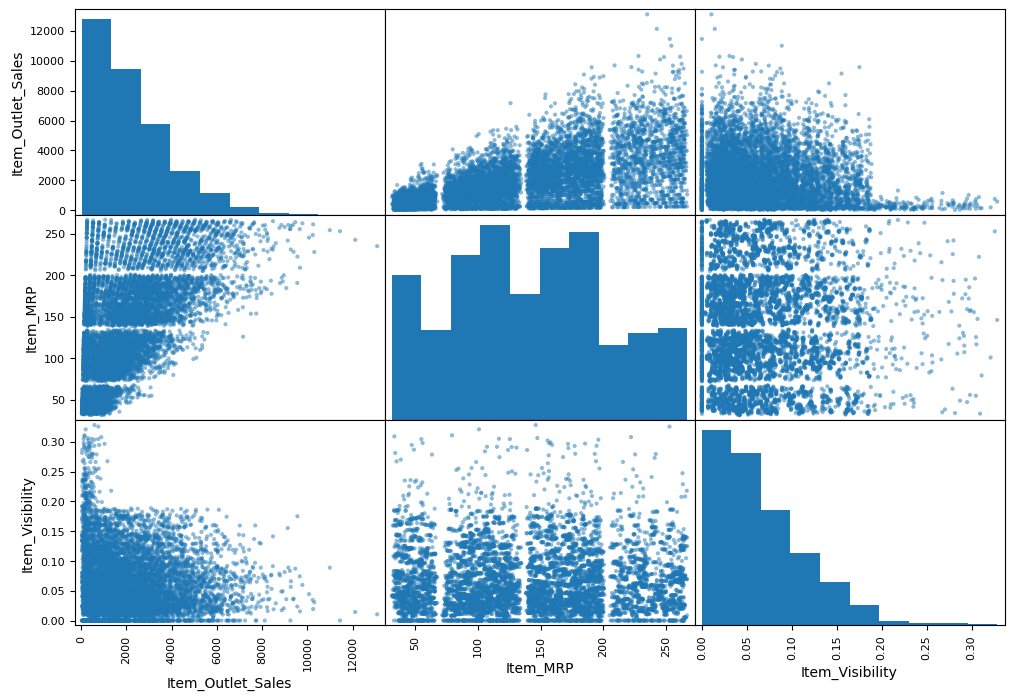

In [49]:
attributes = ["Item_Outlet_Sales", "Item_MRP", "Item_Visibility"]
scatter_matrix(sales[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [50]:


def perform_train_test_split(data, target_column='Item_Outlet_Sales', test_size=0.2, random_state=42):
    """
    Perform train-test split on the dataset.

    Parameters:
    - data: DataFrame, the entire dataset.
    - target_column: str, the column to be used as the target variable.
    - test_size: float, the proportion of the dataset to include in the test split.
    - random_state: int, seed for the random number generator.

    Returns:
    - X_train: DataFrame, training features.
    - X_test: DataFrame, testing features.
    - y_train: Series, training target variable.
    - y_test: Series, testing target variable.
    """
    X = data.drop(columns=[target_column], axis=1)
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Usage
X_train, X_test, y_train, y_test = perform_train_test_split(sales)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (6818, 11)
X_test shape: (1705, 11)


In [54]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Snack Foods,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [57]:
def preprocess_data(train_data, test_data, target_column='Item_Outlet_Sales', discard_variables=None):
    """
    Preprocess both categorical and numerical variables in training and testing datasets.

    Parameters:
    - train_data: DataFrame, the training dataset.
    - test_data: DataFrame, the testing dataset.
    - target_column: str, the target variable.
    - discard_variables: list or None, variables to discard from the analysis.

    Returns:
    - preprocessed_train: DataFrame, preprocessed training dataset.
    - preprocessed_test: DataFrame, preprocessed testing dataset.
    """
    # Combine train and test data for consistent preprocessing
    combined_data = pd.concat([train_data, test_data], ignore_index=True)

    # Replace LF, low fat with Low Fat and reg with Regular in categorical variables
    combined_data['Item_Fat_Content'] = combined_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

    # Discard variables if specified
    if discard_variables is not None:
        # Check if the columns exist before attempting to drop them
        discard_columns = [col for col in discard_variables if col in combined_data.columns]
        combined_data = combined_data.drop(columns=discard_columns, errors='ignore')

    # Imputation for null values in categorical variables with mode
    categorical_columns = combined_data.select_dtypes(include=['object']).columns
    combined_data[categorical_columns] = combined_data[categorical_columns].fillna(combined_data[categorical_columns].mode().iloc[0])

    # One-hot encode categorical variables with less than 5 categories
    for column in categorical_columns:
        if combined_data[column].nunique() < 5:
            combined_data = pd.get_dummies(combined_data, columns=[column], prefix=[column])

    # For remaining variables, include the top 6 categories and allocate one-hot encoding
    for column in categorical_columns:
        if column not in combined_data.columns:
            top_categories = combined_data[column].value_counts().nlargest(6).index
            combined_data[column] = combined_data[column].where(combined_data[column].isin(top_categories), 'Other')
            combined_data = pd.get_dummies(combined_data, columns=[column], prefix=[column])

    # Imputation for null values in numerical variables with median
    numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
    combined_data[numerical_columns] = combined_data[numerical_columns].fillna(combined_data[numerical_columns].median())

    # Standard scaling for numerical variables
    scaler = StandardScaler()
    combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

    # Separate the data back into train and test
    preprocessed_train = combined_data.loc[:train_data.shape[0]-1]
    preprocessed_test = combined_data.loc[train_data.shape[0]:]

    return preprocessed_train, preprocessed_test

# Example usage with two variables to discard
X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, discard_variables=['Item_Identifier','Outlet_Identifier'])


KeyError: 'Item_Fat_Content'